# IC Summer School

Group: Friends of $\pi$

Topic: Education Disparities

Members: 梁嘉琦Vincent    王子仪Cathy  陆天语Cathy  弓瀚铭Jimmy  张兆涵Vicky  冯奕然Leon  刘承昊 Chenghao  王咏怡Olivia  高祥沐Ethan  田嘉乐Jack

Coding: Leon :D

In [ ]:
# Libraries
import pandas as pd
import numpy as np
from pyecharts.charts import Map
from matplotlib import pyplot as plt
from pyecharts import options as opts
from pyecharts.charts import Map
from IPython.display import HTML
from time import sleep
import statsmodels.api as sm
import country_converter as coco
from sklearn.linear_model import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import *
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import *
from sklearn.svm import *
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures 
from math import log

In [ ]:
# Datas
edu = pd.read_csv("EDU.csv", low_memory=False)
gdp = pd.read_csv("GDP.csv", low_memory=False)
ptr = pd.read_csv("PTR.csv", low_memory=False)
sal = pd.read_csv("SAL.csv", low_memory=False)

In [ ]:
region = edu[["iso_code","region_group"]]
region = region.drop_duplicates()
region.index = range(len(region["iso_code"]))
region.columns = ["country","region"]
region

In [ ]:
ss = sal.loc[lambda x:x["sex"] == "Total",["country","value"]]

In [ ]:
ss.index = [i for i in range(len(ss["country"]))]

In [ ]:
# Functions (Loading Data)
def unique(df,column): # to see the values in a column
    s = pd.unique(df[column])
    return s

def ioto(df, col1, col2): # is one to one?
    first = df.drop_duplicates([col1, col2]).groupby(col1)[col2]
    print(first.count())
    first = first.count().max()
    second = df.drop_duplicates([col1, col2]).groupby(col2)[col1].count().max()
    return first + second == 2

def gen_data(df,cat,col=None,iso=True):
    test = []
    for i in range(len(list(df["country"]))):
        if df["category"][i] == cat and (df["year"][i] in [2015,2016,2017]):
            if iso:
                tmp = "iso_code"
            else:
                tmp = "country"
            if cat == "Total":
                test.append([df[tmp][i],df["comp_upsec_v2_m"][i]])
            else:
                test.append([df[tmp][i],df[col][i],df["comp_upsec_v2_m"][i]])
    # unique
    keys = []
    datas = []
    for i in test:
        if cat == "Total":
            k = i[0]
        else:
            k = [i[0],i[1]]
            
        if k not in keys:
            keys.append(k)
            datas.append(i[-1])
        else:
            index = keys.index(k)
            if np.isnan(datas[index]):
                datas[index] = i[-1]
                
    test = []
    for i in range(len(keys)):
        test.append([keys[i],datas[i]])

    test.sort(key=lambda x:x[0])
    
    # 剔除nan
    ntest = []
    for i in test:
        if not np.isnan(i[1]):
            ntest.append(i)
        
    return ntest

#ioto(df,"country","region")

In [ ]:
c4 = ['AFG', 'AGO', 'ALB', 'AUT', 'BDI', 'BEL', 'BLZ', 'BOL', 'BRA', 'CHL', 'CHN', 'CIV', 'COL', 'CRI', 'CYP', 'DEU', 'DJI', 'DOM', 'ECU', 'EGY',
 'ESP', 'EST', 'FIN', 'GEO', 'GHA', 'GRC', 'GTM', 'HND', 'IDN', 'IND', 'ITA', 'JOR', 'KAZ', 'KOR', 'LAO', 'LTU', 'LUX', 'LVA', 'MEX', 'MLI', 'MMR',
 'MRT', 'NOR', 'NPL', 'PAN', 'PER', 'PHL', 'PRT', 'PSE', 'RWA', 'SEN', 'SLE', 'SLV', 'SVN', 'TCD', 'THA', 'TLS', 'TZA', 'USA','ZAF']

In [ ]:
total = gen_data(edu,"Total")
uu = pd.DataFrame({
    "country":[i[0] for i in total],
    "uscr":[i[1] for i in total]
})
color_map = {
    'Central and Southern Asia':"red",
    'Sub-Saharan Africa':"purple",
    'Europe and Northern America':"green",
    'Northern Africa and Western Asia':"yellow",
    'Oceania':"blue",
    'Latin America and the Caribbean':"cyan",
    'Eastern and South-eastern Asia':"orange"
}
gg = gdp[["country","value"]]
pp = ptr[["country","value"]]
cc = c4
u2 = [0 for i in range(len(cc))]
g2 = [0 for i in range(len(cc))]
p2 = [0 for i in range(len(cc))]
s2 = [0 for i in range(len(cc))]
r2 = ["" for i in range(len(cc))]
for i in range(len(cc)):
    for j in range(len(uu["country"])):
        if uu["country"][j] == cc[i]:
            u2[i] = uu["uscr"][j]
for i in range(len(cc)):
    for j in range(len(gg["country"])):
        if gg["country"][j] == cc[i]:
            g2[i] = gg["value"][j]
for i in range(len(cc)):
    for j in range(len(pp["country"])):
        if pp["country"][j] == cc[i]:
            p2[i] = pp["value"][j]
for i in range(len(cc)):
    for j in range(len(ss["country"])):
        if ss["country"][j] == cc[i]:
            s2[i] = ss["value"][j]
for i in range(len(cc)):
    for j in range(len(region["country"])):
        if region["country"][j] == cc[i]:
            r2[i] = color_map[region["region"][j]]
g2

In [ ]:
def llgg(original):
    new = [0 for i in range(len(original))]
    for i in range(len(original)):
        #print(original[i])
        new[i] = log(original[i])
    return new

0.644694833203787


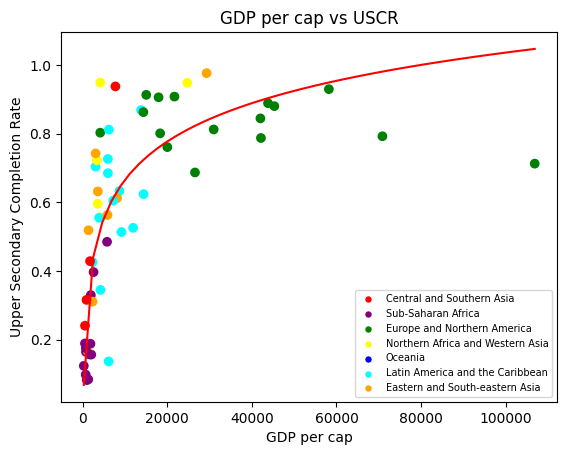

In [224]:
# GDP
plt.scatter(g2,u2,c=r2)
labelss = ['Central and Southern Asia',
    'Sub-Saharan Africa',
    'Europe and Northern America',
    'Northern Africa and Western Asia',
    'Oceania',
    'Latin America and the Caribbean',
    'Eastern and South-eastern Asia'
          ]
red = plt.scatter([],[],c="red")
purple = plt.scatter([],[],c="purple")
green = plt.scatter([],[],c="green")
yellow = plt.scatter([],[],c="yellow")
blue = plt.scatter([],[],c="blue")
cyan = plt.scatter([],[],c="cyan")
orange = plt.scatter([],[],c="orange")

x_lg = pd.DataFrame(llgg(g2))
model = LinearRegression()
model.fit(x_lg,pd.DataFrame(u2))
xxx = np.linspace(min(g2),max(g2),50)
print(model.score(x_lg,pd.DataFrame(u2)))
plt.plot(xxx,model.predict(pd.DataFrame(llgg(xxx))),color = "red")
#plt.xscale("log")
plt.xlabel("GDP per cap")
plt.ylabel("Upper Secondary Completion Rate")
plt.title("GDP per cap vs USCR")
plt.legend([red,purple,green,yellow,blue,cyan,orange],labelss,markerscale=0.6,fontsize=7)

In [ ]:
# UTR
plt.scatter(p2,u2,c=r2)
labelss = ['Central and Southern Asia',
    'Sub-Saharan Africa',
    'Europe and Northern America',
    'Northern Africa and Western Asia',
    'Oceania',
    'Latin America and the Caribbean',
    'Eastern and South-eastern Asia'
          ]
red = plt.scatter([],[],c="red")
purple = plt.scatter([],[],c="purple")
green = plt.scatter([],[],c="green")
yellow = plt.scatter([],[],c="yellow")
blue = plt.scatter([],[],c="blue")

0.43008629224103745


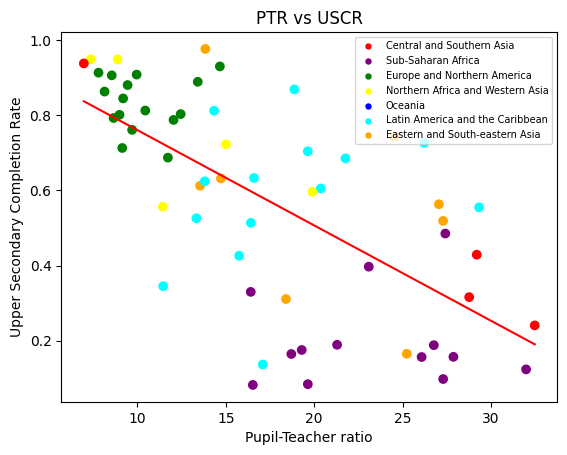

In [ ]:
cyan = plt.scatter([],[],c="cyan")
orange = plt.scatter([],[],c="orange")

x_lg = pd.DataFrame(p2)
model = LinearRegression()
model.fit(x_lg,pd.DataFrame(u2))
xxx = np.linspace(min(p2),max(p2),50)
print(model.score(x_lg,pd.DataFrame(u2)))
plt.plot(xxx,model.predict(pd.DataFrame(xxx)),color = "red")
plt.xlabel("Pupil-Teacher ratio")
plt.ylabel("Upper Secondary Completion Rate")
plt.title("PTR vs USCR")
plt.legend([red,purple,green,yellow,blue,cyan,orange],labelss,markerscale=0.6,fontsize=7)

0.44060377772638404


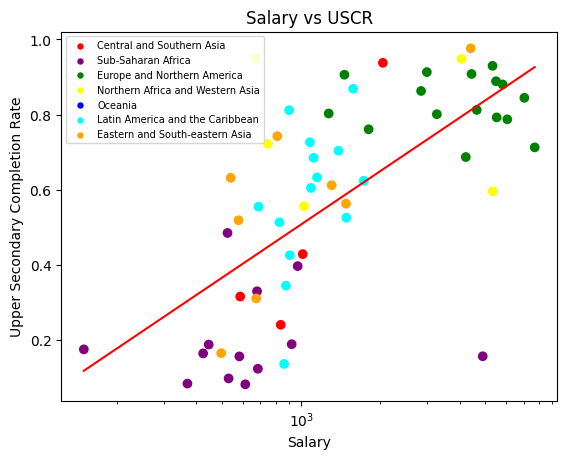

In [223]:
# Salary
plt.scatter(s2,u2,c=r2)
labelss = ['Central and Southern Asia',
    'Sub-Saharan Africa',
    'Europe and Northern America',
    'Northern Africa and Western Asia',
    'Oceania',
    'Latin America and the Caribbean',
    'Eastern and South-eastern Asia'
          ]
red = plt.scatter([],[],c="red")
purple = plt.scatter([],[],c="purple")
green = plt.scatter([],[],c="green")
yellow = plt.scatter([],[],c="yellow")
blue = plt.scatter([],[],c="blue")
cyan = plt.scatter([],[],c="cyan")
orange = plt.scatter([],[],c="orange")

x_lg = pd.DataFrame(llgg(s2))
model = LinearRegression()
model.fit(x_lg,pd.DataFrame(u2))
xxx = np.linspace(min(s2),max(s2),50)
print(model.score(x_lg,pd.DataFrame(u2)))
plt.plot(xxx,model.predict(pd.DataFrame(llgg(xxx))),color = "red")
plt.xlabel("Salary")
plt.ylabel("Upper Secondary Completion Rate")
plt.xscale("log")
plt.title("Salary vs USCR")
plt.legend([red,purple,green,yellow,blue,cyan,orange],labelss,markerscale=0.6,fontsize=7)

In [ ]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2,1)
plt.scatter(g3,p3,s=list(pd.Series(u3)*50))
plt.title("original dataset")
plt.subplot(1, 2,2)
plt.scatter(g3,p3,s=list(pd.Series(model.predict(pd.DataFrame({"GDP":g3,"PTR":p3}))*50)))
plt.title("predict dataset")

plt.tight_layout()

In [ ]:
edu.columns

In [ ]:
gen_data(edu,"Location","location")

In [ ]:
unique(edu, "location")

In [ ]:
# gender difference only (not been altered)
gender = gen_data("Sex","sex")
def gd(test):
    ntest = [[0,0] for i in range(len(test)//2)]
    for i in range(0,len(test),2):
        ntest[i//2][0] = test[i][0][:-1]
        ntest[i//2][1] = test[i+1][1] - test[i][1]
        if test[i][0][-1] == "M":
            ntest[i//2][1] = -ntest[i//2][1]
    return nteat

gd=[]
tr=[]
for i in range(len(total)):
    for j in range(len(nnnntest)):
        if total[i][0] == nnnntest[j][0]:
            tr.append(total[i][1])
            gd.append(nnnntest[j][1])

nnnntest.sort(key=lambda x: x[1])
nnnnntest = nnnntest[::13]
plt.title("Gender Difference (Male - Female) in USCR")
plt.plot([i[0] for i in nnnnntest],[i[1] for i in nnnnntest])

In [ ]:
plt.title("Gender Difference (Male - Female) according to the USCR")
plt.scatter(tr,gd)
x = np.linspace(0,1,50)
y = m*x+c
plt.plot(x,y,color="red")
plt.xlabel("Upper Secondary Completion Rate")
plt.ylabel("Gender Difference")

In [ ]:
model = sm.OLS(gd,tr).fit()
model.summary()

predicts = model.predict()
plt.plot(tr,predicts,color="red")
plt.scatter(tr,gd)

In [ ]:
def draw_map(title,ftitle,data_set):
    c = (
        Map()
        .add(title, data_set, "world")
        .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
        .set_global_opts(
            title_opts=opts.TitleOpts(title="Upper Secondary Completion Rate"),
            visualmap_opts=opts.VisualMapOpts(max_=1),
        )
        .render(f"uscr_{ftitle}.html")
    )
    
    with open(f"./uscr_{ftitle}.html","r") as f:
        t = f.read()
    sleep(0.4)
    return HTML(t)

In [ ]:
c4

In [ ]:
ccc = [coco.convert(i,to="name_short") for i in c4]
tmp = [[i,1] for i in ccc]
tmp

In [ ]:
draw_map("Test","test",tmp)

In [ ]:
draw_map("Test","test",tmp)

In [ ]:
pd.DataFrame(total,columns=["country","value"])

In [ ]:
total = gen_data(edu,"Total",iso=False)

draw_map("Total","total",total)

In [ ]:
draw_map("Gender Difference (Male - Female)","gender",nnntest)